# Analyzing simulation data

In [1]:
#from IPython.core.display import HTML
#HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [2]:
%load_ext autoreload
%autoreload 2
from prediction_grids import *

## Testing Experiment class

In [3]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/ml_topological_phases_in_real_space/simulation/first_and_second_neighbours"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

#### Viewing Train/Val/Test split

In [4]:
experiment.print_train_val_test()

% train:  0.4208199969516842
% val:  0.42066758116140834
% test:  0.15851242188690748
% train + val + test:  1.0


number of train hamiltonians:  2761
number of val hamiltonians:  2760
number of test hamiltonians:  1040
total number of hamiltonians:  6561


#### Viewing data set summary

In [5]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
 0    0.325122
 1    0.322586
-1    0.178953
 2    0.173338
Name: phase, dtype: float64


total train/val phases: 
 0    1795
 1    1781
-1     988
 2     957
Name: phase, dtype: int64


Summary of test data

% test phases: 
 2    0.399302
-1    0.363213
 1    0.126892
 0    0.110594
Name: phase, dtype: float64


total test phases: 
 2    343
-1    312
 1    109
 0     95
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
 1    0.296238
 0    0.296238
-1    0.203762
 2    0.203762
Name: phase, dtype: float64


total phases: 
 1    1890
 0    1890
-1    1300
 2    1300
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [6]:
experiment.eigenvector_summary.head()

id  phase  pred_phase type_of
0   0    999          -1    test
1   0    999          -1    test
2   0    999          -1    test
3   0    999           1    test
4   0    999          -1    test

#### Viewing hamiltonian summary

In [7]:
experiment.hamiltonian_summary.head()

t1    t2 type_of    -1     0     1     2  phase  pred_phase
id                                                              
0  -2.0 -2.00    test  0.24  0.50  0.24  0.02    999           0
1  -2.0 -1.95    test  0.21  0.53  0.23  0.03     -1           0
2  -2.0 -1.90    test  0.25  0.50  0.25  0.00     -1           0
3  -2.0 -1.85    test  0.27  0.48  0.23  0.02     -1           0
4  -2.0 -1.80    test  0.27  0.46  0.25  0.02     -1           0

#### Viewing accuracy 

In [8]:
experiment.accuracy

{'eigenvector_train': 0.9998116624411445,
 'eigenvector_val': 0.9713804347826087,
 'eigenvector_test': 0.6714901047729919,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9963768115942029,
 'hamiltonian_test': 0.8777648428405123}

#### Visualizing train/val/test splits with scatter plot

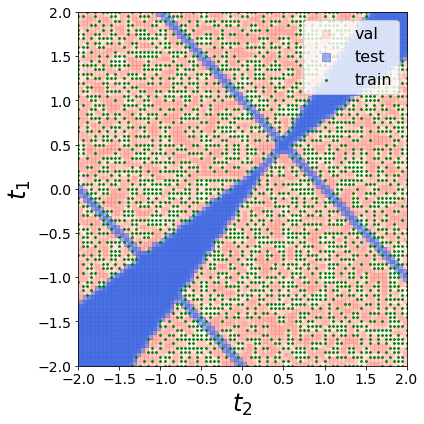

In [9]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/fig1b-6561-100-train_val_test_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)



#### Plotting train winding labels with scatter plot.

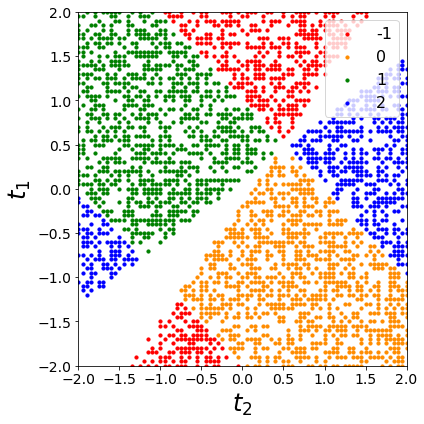

In [10]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1b-6561-100-train_winding_labels_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

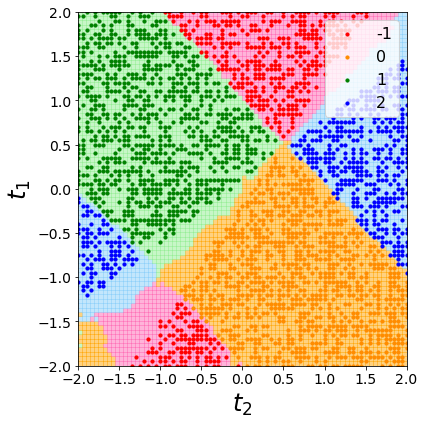

In [16]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, -1: {"marker": "o", "s": 10, "color": "red", "label": -1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}}
winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/fig1b-6561-100-prediction_grid_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)






#### Plotting Winding heatmaps

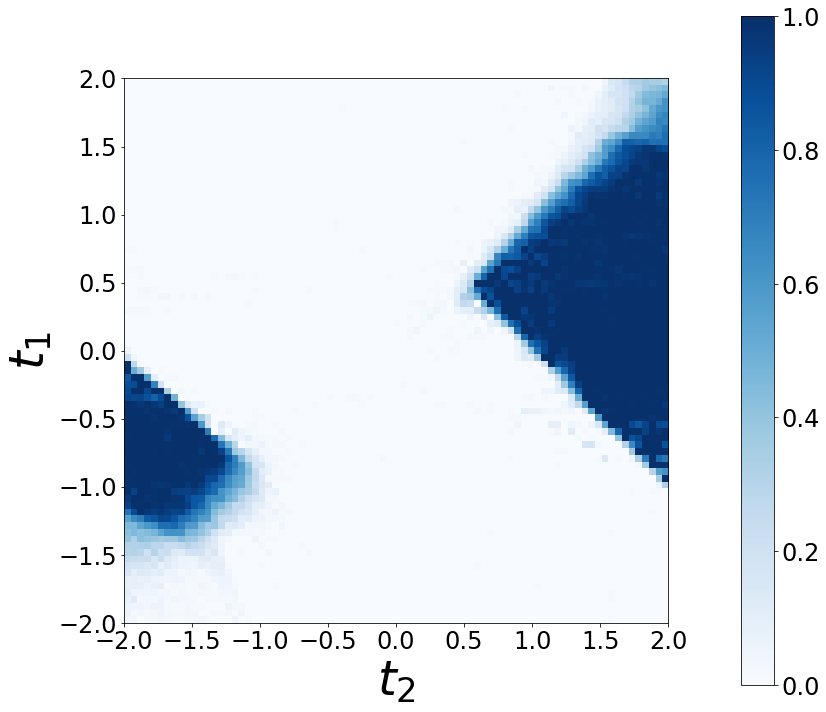

In [27]:
winding = 2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8, "labelsize": 24}
##########
fig_params = fig_params={"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
path_to_save = "/home/rio/1901.01963/fig1b-6561-100-winding_grid_2.png"
savefig_params = {"fname": path_to_save}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)



#### Defining some colormaps

In [31]:
###Reds_alpha
ncolors = 256
color_array = plt.get_cmap('Reds')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='Reds_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)


###Oranges_alpha
ncolors = 256
color_array = plt.get_cmap('Oranges')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='Oranges_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)


### Greens_alpha
ncolors = 256
color_array = plt.get_cmap('Greens')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='Greens_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)

### Blues_alpha
ncolors = 256
color_array = plt.get_cmap('Blues')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='Blues_alpha',colors=color_array)
plt.register_cmap(cmap=map_object)


#### Plotting merged heatmaps

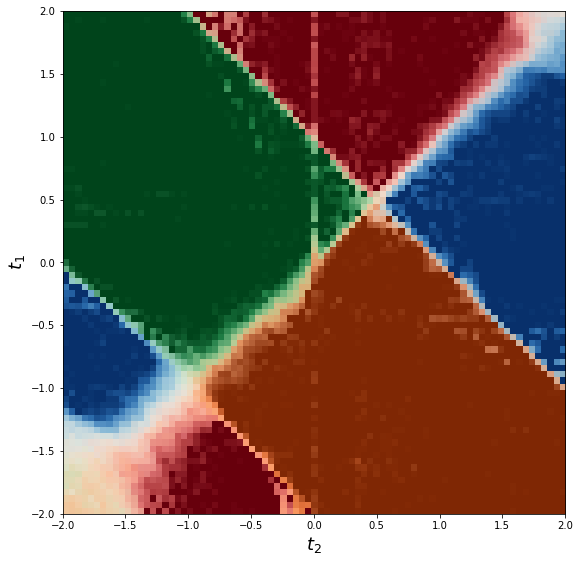

In [33]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
colorbar_params={}
##########
fig_params = {"figsize": (8,8)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 18}
ylabel_params={"ylabel": "$t_1$", "fontsize": 18}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {}
yticks_params = {}
tight_params = {}
path_to_save = "/home/linneu/Dropbox/Machine/paper_linneu/fig1b-6561-100-merged_winding_grid_0.png"
#savefig_params = {"fname": path_to_save}
savefig_params = {}
experiment.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

## Testing Simulation Class

In [34]:
simulation_name = "first_and_second_neighbours"
n_experiments = None
load_hamiltonian_summary = False
simulation = Simulation(simulation_name, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [35]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 130364.15it/s]


In [36]:
simulation.hamiltonian_summary

t1    t2 type_of      -1       0       1       2  phase  pred_phase
id                                                                        
0    -2.0 -2.00    test  0.2160  0.4738  0.2726  0.0376    999           0
1    -2.0 -1.95    test  0.2227  0.4884  0.2552  0.0337     -1           0
2    -2.0 -1.90    test  0.2237  0.4660  0.2765  0.0338     -1           0
3    -2.0 -1.85    test  0.2486  0.4101  0.3086  0.0327     -1           0
4    -2.0 -1.80    test  0.2455  0.4128  0.3169  0.0248     -1           0
5    -2.0 -1.75    test  0.2540  0.4260  0.3000  0.0200     -1           0
6    -2.0 -1.70    test  0.2746  0.4264  0.2784  0.0206     -1           0
7    -2.0 -1.65    test  0.3028  0.3862  0.2903  0.0207     -1           0
8    -2.0 -1.60    test  0.3456  0.3502  0.2782  0.0260     -1           0
9    -2.0 -1.55    test  0.3962  0.2736  0.3055  0.0247     -1          -1
10   -2.0 -1.50    test  0.4621  0.2417  0.2725  0.0237     -1          -1
11   -2.0 -1.45    test  0.5346  0.2150  0.2175  0.0329     -1          -1
12   -2.0 -1.40    test  0.6180  0.1510  0.2032  0.0278     -1          -1
13   -2.0 -1.35   train  0.8357  0.0603  0.0920  0.0120     -1          -1
14   -2.0 -1.30     val  0.8811  0.0530  0.0599  0.0060     -1          -1
15   -2.0 -1.25   train  0.9466  0.0226  0.0279  0.0029     -1          -1
16   -2.0 -1.20     val  0.9475  0.0098  0.0244  0.0183     -1          -1
17   -2.0 -1.15   train  0.9491  0.0080  0.0309  0.0120     -1          -1
18   -2.0 -1.10     val  0.9581  0.0041  0.0292  0.0086     -1          -1
19   -2.0 -1.05   train  0.9745  0.0088  0.0160  0.0007     -1          -1
20   -2.0 -1.00     val  0.9840  0.0042  0.0118  0.0000     -1          -1
21   -2.0 -0.95   train  0.9911  0.0024  0.0065  0.0000     -1          -1
22   -2.0 -0.90   train  0.9901  0.0068  0.0031  0.0000     -1          -1
23   -2.0 -0.85     val  0.9954  0.0011  0.0035  0.0000     -1          -1
24   -2.0 -0.80   train  0.9928  0.0036  0.0036  0.0000     -1          -1
25   -2.0 -0.75   train  0.9776  0.0098  0.0125  0.0001     -1          -1
26   -2.0 -0.70   train  0.9883  0.0054  0.0063  0.0000     -1          -1
27   -2.0 -0.65     val  0.9951  0.0038  0.0009  0.0002     -1          -1
28   -2.0 -0.60     val  0.9943  0.0057  0.0000  0.0000     -1          -1
29   -2.0 -0.55   train  0.9963  0.0026  0.0008  0.0003     -1          -1
...   ...   ...     ...     ...     ...     ...     ...    ...         ...
6531  2.0  0.55     val  0.9915  0.0074  0.0009  0.0002     -1          -1
6532  2.0  0.60     val  0.9926  0.0068  0.0003  0.0003     -1          -1
6533  2.0  0.65   train  0.9916  0.0084  0.0000  0.0000     -1          -1
6534  2.0  0.70   train  0.9950  0.0050  0.0000  0.0000     -1          -1
6535  2.0  0.75   train  0.9965  0.0032  0.0003  0.0000     -1          -1
6536  2.0  0.80   train  0.9986  0.0011  0.0003  0.0000     -1          -1
6537  2.0  0.85     val  0.9985  0.0014  0.0000  0.0001     -1          -1
6538  2.0  0.90   train  0.9975  0.0017  0.0001  0.0007     -1          -1
6539  2.0  0.95     val  0.9941  0.0048  0.0002  0.0009     -1          -1
6540  2.0  1.00   train  0.9983  0.0010  0.0000  0.0007     -1          -1
6541  2.0  1.05   train  0.9942  0.0053  0.0000  0.0005     -1          -1
6542  2.0  1.10   train  0.9956  0.0027  0.0015  0.0002     -1          -1
6543  2.0  1.15   train  0.9956  0.0019  0.0005  0.0020     -1          -1
6544  2.0  1.20     val  0.9982  0.0010  0.0006  0.0002     -1          -1
6545  2.0  1.25     val  0.9982  0.0015  0.0001  0.0002     -1          -1
6546  2.0  1.30     val  0.9973  0.0023  0.0002  0.0002     -1          -1
6547  2.0  1.35     val  0.9942  0.0033  0.0004  0.0021     -1          -1
6548  2.0  1.40   train  0.9944  0.0024  0.0002  0.0030     -1          -1
6549  2.0  1.45   train  0.9899  0.0037  0.0017  0.0047     -1          -1
6550  2.0  1.50   train  0.9784  0.0068  0.0066  0.0082     -1          -1
6551  2.0  1.55     val  0.9137 

#### Plotting simulation winding heatmaps

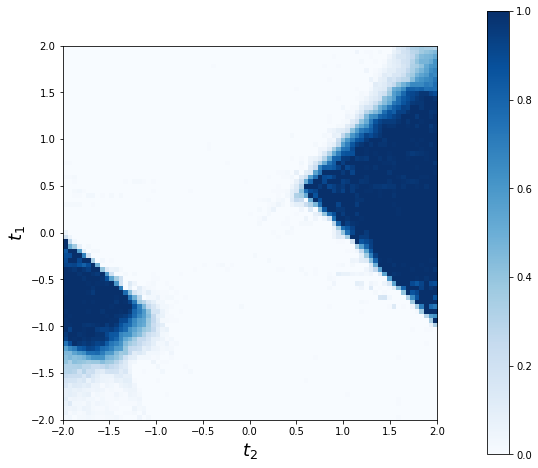

In [40]:
winding = 2
imshow_params = {"cmap": "Blues", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], "vmin": 0, "vmax": 1}
colorbar_params=colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", \
                                 "pad": 0.1, "shrink": 0.8}
##########
fig_params = fig_params={"figsize": (8,8)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 18}
ylabel_params={"ylabel": "$t_1$", "fontsize": 18}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {}
yticks_params = {}
path_to_save = "/home/rio/1901.01963/fig1b-441_simulation_winding_grid_blue.png"
savefig_params = {"fname": path_to_save}
tight_params = {}
#experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
#                               ylabel_params, title_params, savefig_params)
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)




#### Plotting simulation merged heatmaps

Plotting winding -1
Plotting winding 0
Plotting winding 1
Plotting winding 2


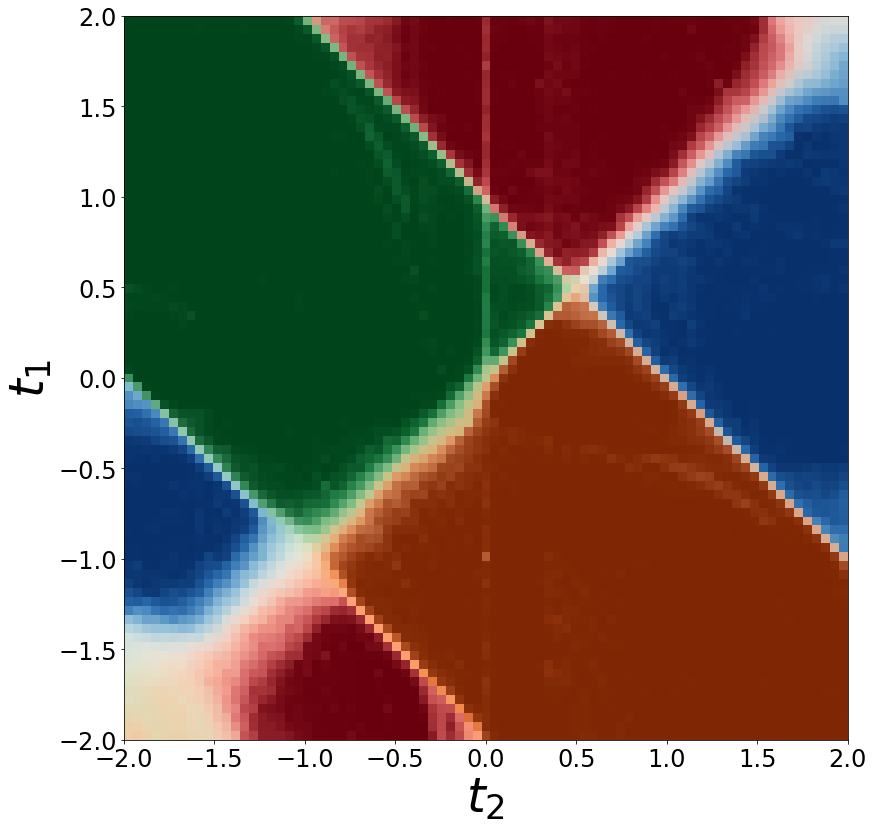

In [43]:
winding_params = {-1: {"cmap": "Reds_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1},
                 0: {"cmap": "Oranges_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 1: {"cmap": "Greens_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2], \
                     "vmin": 0, "vmax": 1},
                 2: {"cmap": "Blues_alpha", "aspect": "equal", "alpha": 1, "origin": "lower", "extent": [-2,2,-2,2],\
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None}
colorbar_params={}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params={}
path_to_save = "/home/rio/1901.01963/fig1b-6561-100-simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [44]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)

computing mean accuracies: 100%|██████████| 100/100 [00:22<00:00,  4.59it/s]


In [45]:
simulation.mean_accuracy

{'eigenvector_train': 0.9997190148496923,
 'eigenvector_val': 0.9742531159420291,
 'eigenvector_test': 0.6755254947613503,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 0.9972065217391304,
 'hamiltonian_test': 0.8806868451688008}

#### Computing bootstrap accuracies

In [46]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk)

In [47]:
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8859138533178114}